In [1]:
import pandas
from matplotlib import pyplot
import numpy
import math

In [2]:
data_frame = pandas.read_csv("covid.csv");

de_data = data_frame.loc[data_frame['Country'] == 'Germany']
de_new_cases = list(de_data["New_cases"])[365:-5]

ch_data = data_frame.loc[data_frame['Country'] == 'Switzerland']
ch_new_cases = list(ch_data["New_cases"])[365:-5]

at_data = data_frame.loc[data_frame['Country'] == 'Austria']
at_new_cases = list(at_data["New_cases"])[365:-5]

In [3]:
de_population = 83783942
de_number_of_thousands = de_population / 1000

ch_population = 8654622
ch_number_of_thousands = ch_population / 1000

at_population = 9006398
at_number_of_thousands = at_population / 1000

In [4]:
de_new_cases = list( map( lambda x: x/de_number_of_thousands, de_new_cases ) )
ch_new_cases = list( map( lambda x: x/ch_number_of_thousands, ch_new_cases ) )
at_new_cases = list( map( lambda x: x/at_number_of_thousands, at_new_cases ) )

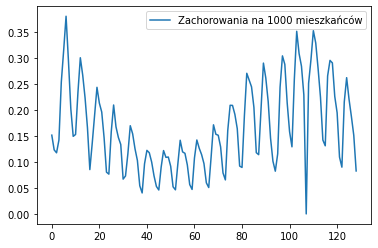

In [5]:
pyplot.plot(de_new_cases, label="Zachorowania na 1000 mieszkańców")
pyplot.legend()
pyplot.show()

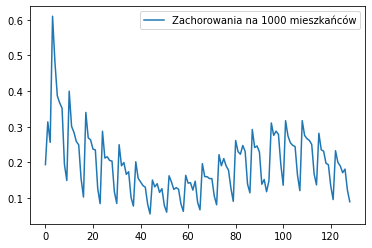

In [6]:
pyplot.plot(ch_new_cases, label="Zachorowania na 1000 mieszkańców")
pyplot.legend()
pyplot.show()

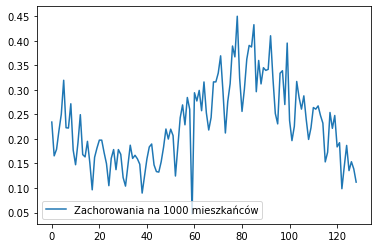

In [7]:
pyplot.plot(at_new_cases, label="Zachorowania na 1000 mieszkańców")
pyplot.legend()
pyplot.show()

In [8]:
def S_squared(values):
    n = len(values)
    mean = numpy.mean(values)
    total_sum = 0
    for x in values:
        total_sum += (x - mean)**2
    return total_sum * (1 / n)

de_S_squared = S_squared(de_new_cases)
ch_S_squared = S_squared(ch_new_cases)
at_S_squared = S_squared(at_new_cases)

print("Estymowane wariancje")
print("Niemcy: ", de_S_squared)
print("Szwajcaria: ", ch_S_squared)
print("Austria", at_S_squared)

Estymowane wariancje
Niemcy:  0.006579581235847384
Szwajcaria:  0.007602409958582666
Austria 0.00662744930539197


In [9]:
def t_test(X, Y):
    n_y = len(Y)
    n_x = len(X)
    X_mean = numpy.mean(X)
    Y_mean = numpy.mean(Y)
    numerator = X_mean - Y_mean;
    denominator =  S_squared(Y) * n_y
    denominator += S_squared(X) * n_x
    denominator /= n_x * n_y
    denominator = math.sqrt(denominator)
    return numerator / denominator

In [10]:
from scipy import stats

In [11]:
def p_value(t, degrees_of_freedom):
    if t < 0:
        return 2 * stats.t.cdf(t, degrees_of_freedom)
    else:
        return 2 * (1 - stats.t.cdf(t, degrees_of_freedom))

In [12]:
print("Niemcy i Austria")
de_at_t = t_test(de_new_cases, at_new_cases)
de_at_t
print("Wartość testu: ", de_at_t)
print("p_value: ", p_value(de_at_t, len(de_new_cases) + len(at_new_cases) - 2 ))

Niemcy i Austria
Wartość testu:  -6.454618919939574
p_value:  5.403739432961198e-10


In [13]:
print("Niemcy i Szwajcaria")
de_ch_t = t_test(de_new_cases, ch_new_cases)
print("Wartość testu: ", de_ch_t)
print("p_value: ", p_value(de_ch_t, len(de_new_cases) + len(ch_new_cases) - 2 ))

Niemcy i Szwajcaria
Wartość testu:  -2.818652207888759
p_value:  0.005199286096320853


In [14]:
print("Austria i Szwajcaria")
at_ch_t = t_test(ch_new_cases, at_new_cases)
print("Wartość testu: ", at_ch_t)
print("p_value: ", p_value(at_ch_t, len(at_new_cases) + len(ch_new_cases) - 2 ))

Austria i Szwajcaria
Wartość testu:  -3.404410177522356
p_value:  0.0007695504787311669
